A:\anaconda3_installed\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['0_-1_-1' '1_0_0' '1_0_1' '1_0_2' '1_1_0' '1_1_1' '1_1_2' '1_2_0' '1_2_1'
 '1_2_2'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
A:\anaconda3_installed\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['0_-1_-1' '1_0_0' '1_0_1' '1_0_2' '1_1_0' '1_1_1' '1_1_2' '1_2_0' '1_2_1'
 '1_2_2'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
A:\anaconda3_installed\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword a

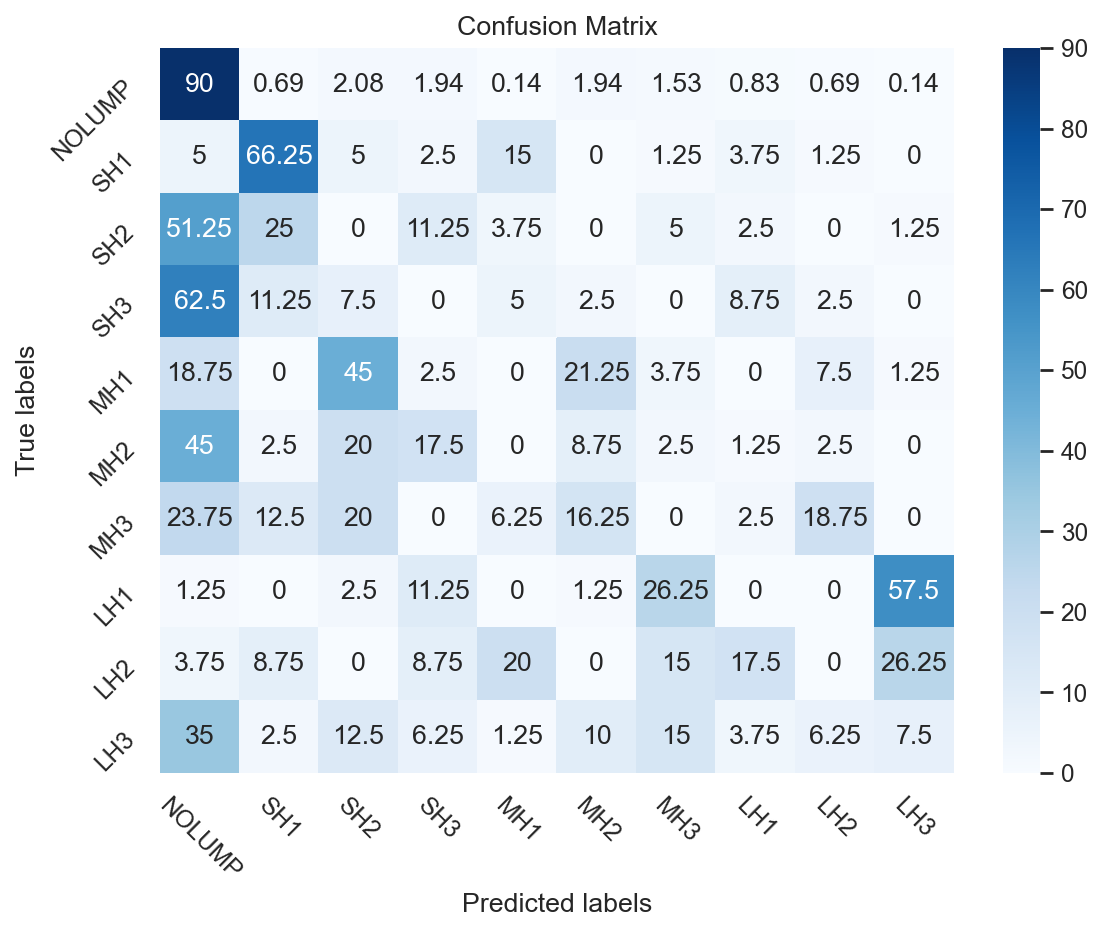

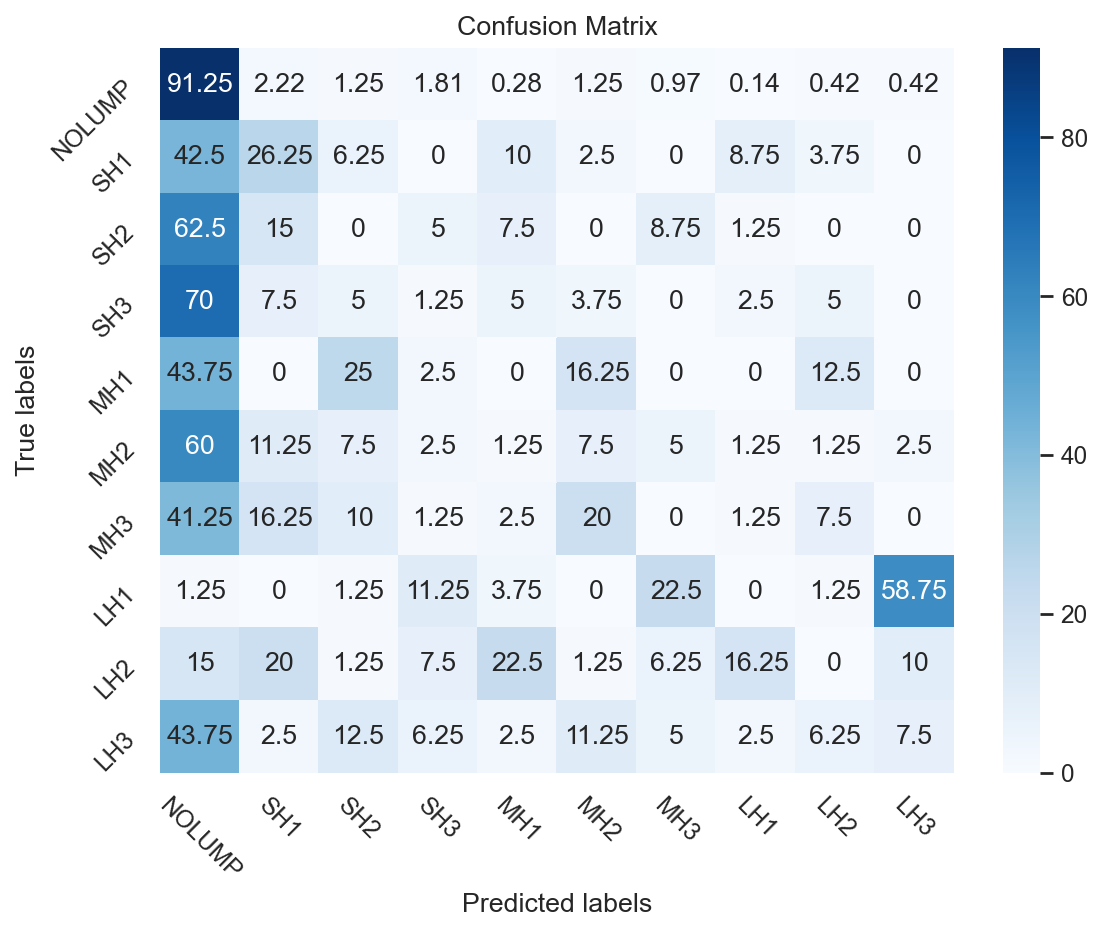

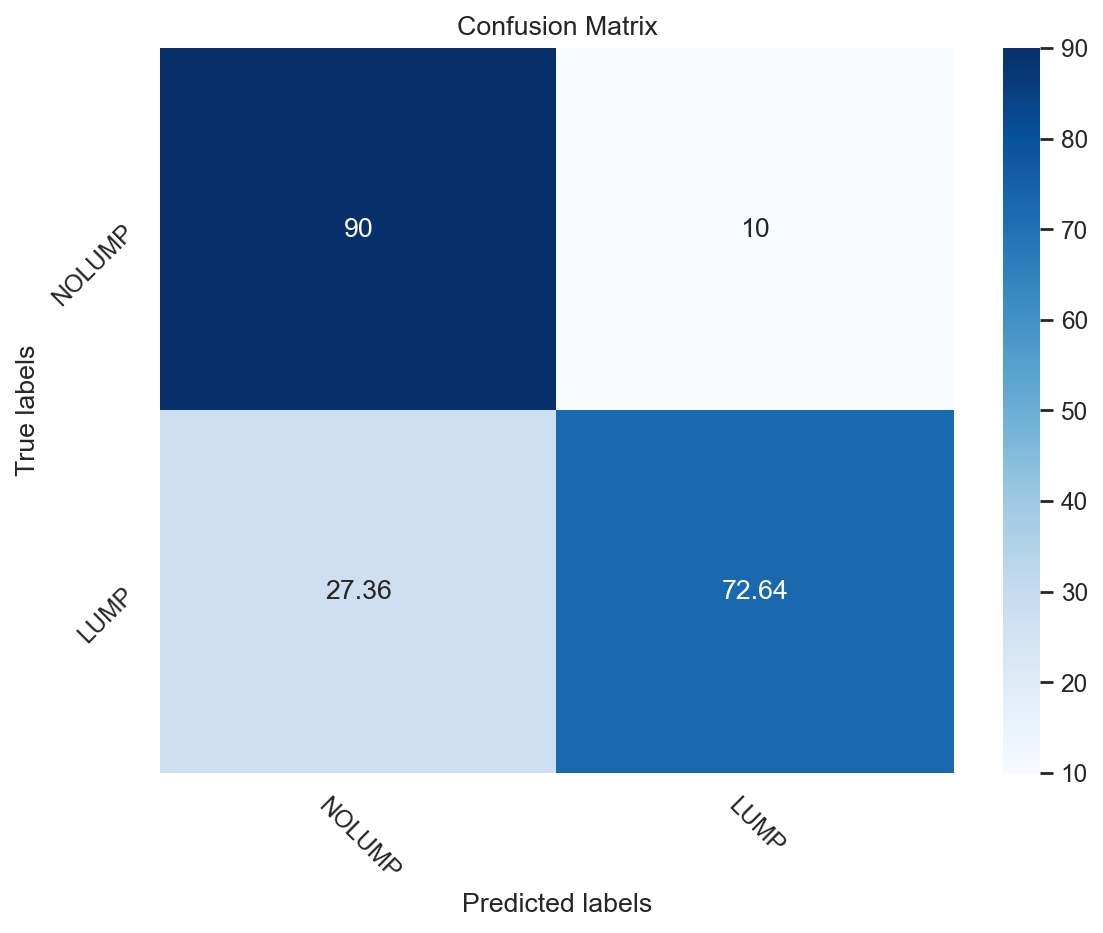

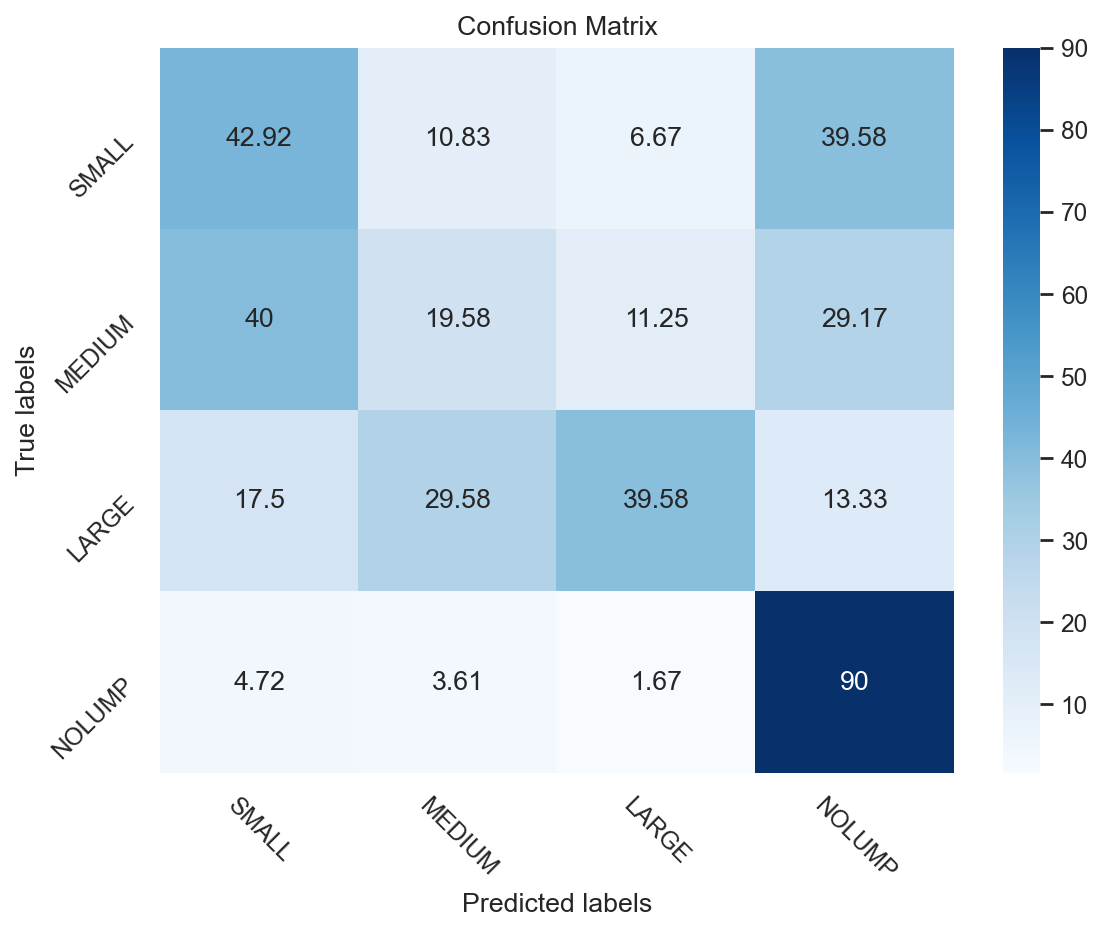

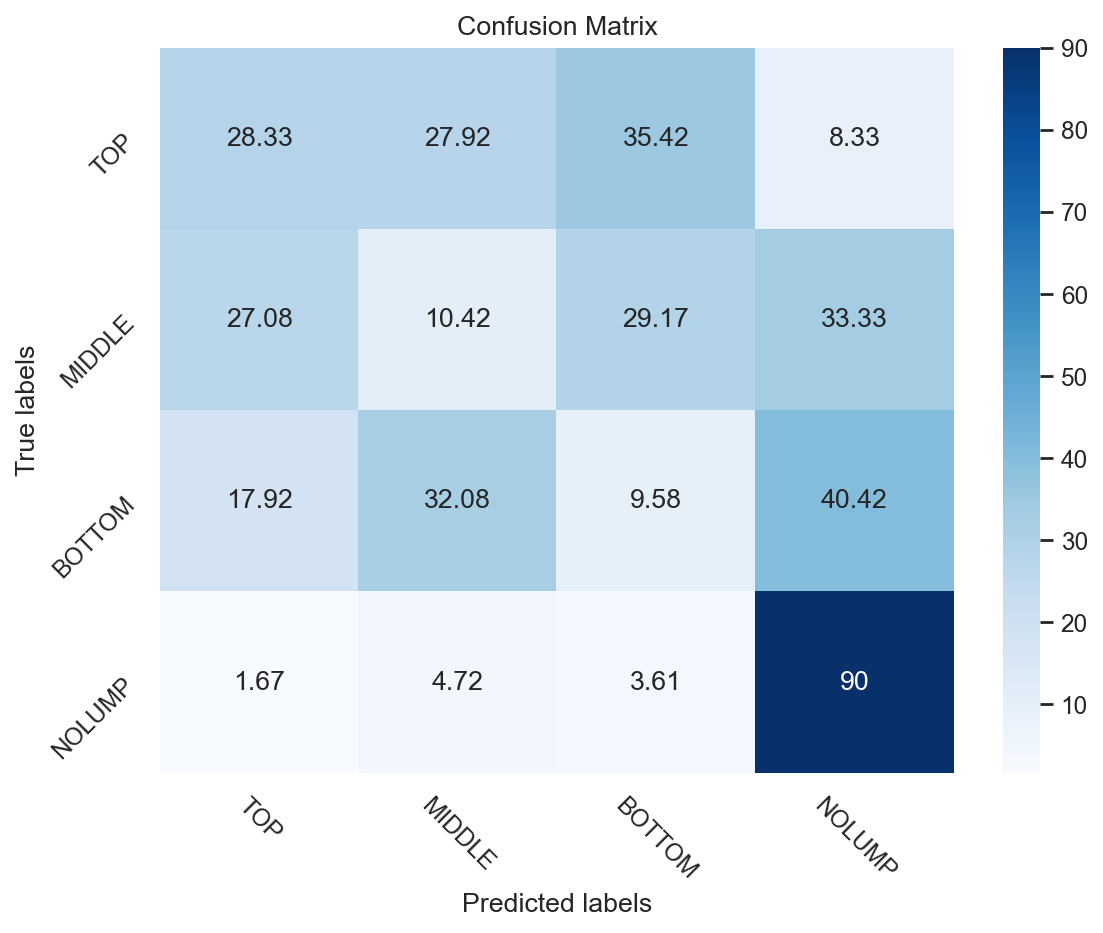

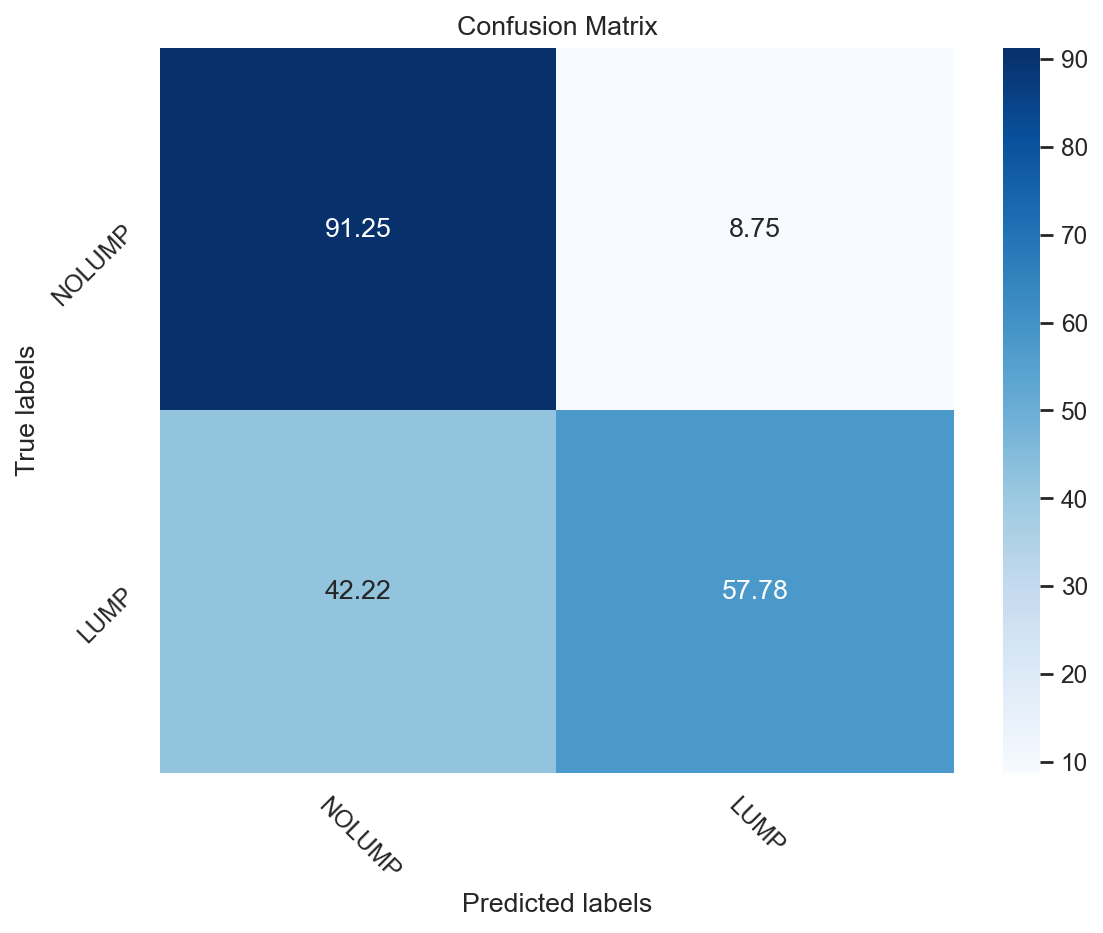

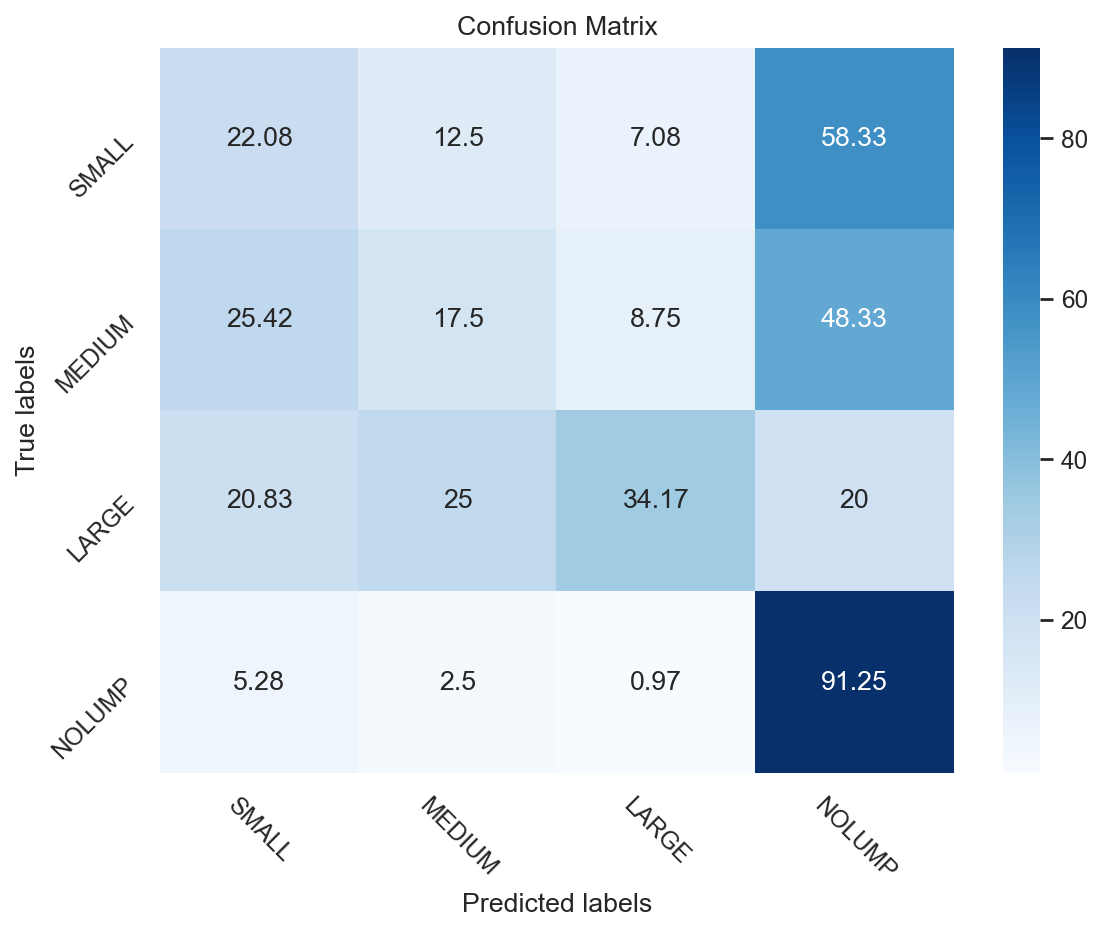

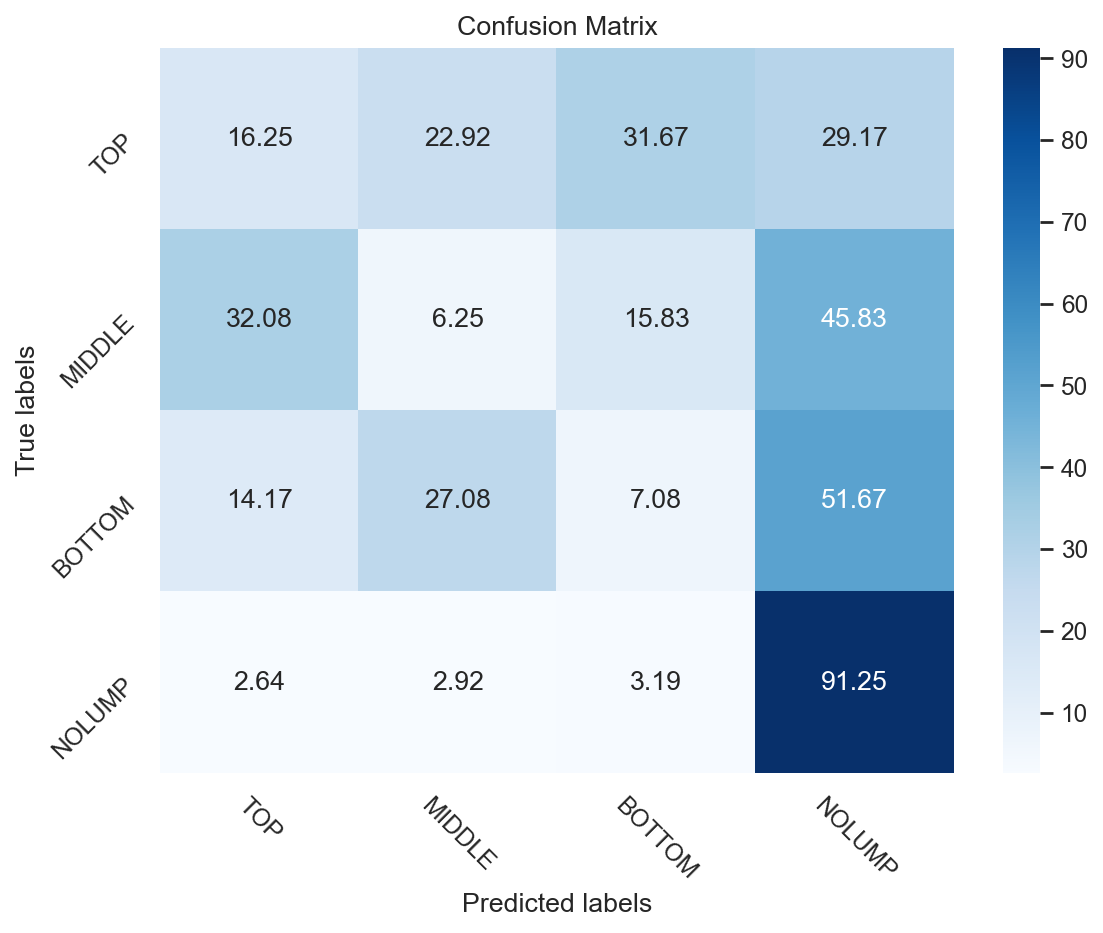

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import sys
import sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
np.set_printoptions(threshold=sys.maxsize)   
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 300)
pd.set_option('display.expand_frame_repr', True)
index_dir = 2
index = 0 # choose sub label
idx = 0
label = [0, 1, 2, -1]
b_label = [0, 1]

# change direactory to take data
def change_dir(
        index):
    
    dir_win = 'J:/project files/lab_files/lump_project/data/moldir_blind_exp/'
    dir_mac = '/Volumes/Samsung_T5/project files/lab_files/lump_project/data/moldir_blind_exp/'
    if index == 1:
        directory = dir_mac
    else:
        directory = dir_win
    os.chdir(directory)
    
def normalize_conf_m(
        df, df_t, index, label, labels, idx, title):
    col = df.columns
#     print(df_t[col[index]])
#     l = np.shape(conf_matrix)[1]
    if idx == 14:
        conf_matrix = confusion_matrix(df_t.values[:, index], df.values[:, index], label)
        conf_matrix_norm = np.zeros((np.shape(conf_matrix)[0], np.shape(conf_matrix)[1]))
        conf_matrix_norm[1:np.shape(conf_matrix)[1]] = np.round(conf_matrix[1:np.shape(conf_matrix)[1]]/80*100, 2)
        conf_matrix_norm[0] = np.round(conf_matrix[0]/720*100, 2)
    elif idx == 1:
#         print(col[index])
        conf_matrix = confusion_matrix(df_t[col[index]], df.values[:, index].astype(int), label)
        conf_matrix_norm = np.zeros((np.shape(conf_matrix)[0], np.shape(conf_matrix)[1]))
        conf_matrix_norm[0:np.shape(conf_matrix)[1]] = np.round(conf_matrix[0:np.shape(conf_matrix)[1]]/240*100, 2)
        conf_matrix_norm[np.shape(conf_matrix)[1]-1] = np.round(conf_matrix[np.shape(conf_matrix)[1]-1]/720*100, 2)
    else:
        conf_matrix = confusion_matrix(df_t[col[index]], df.values[:, index].astype(int), label)
        conf_matrix_norm = np.zeros((np.shape(conf_matrix)[0], np.shape(conf_matrix)[1]))
        conf_matrix_norm = np.round(conf_matrix/720*100, 2)
    plot_conf_m(conf_matrix_norm, labels, title)
    
def plot_conf_m(
        conf_matrix_norm, labels, title):
    
    plt.figure(figsize=(8, 6), dpi=160)
    
    ax = plt.subplot()
    sns.set(font_scale=1)
    sns.heatmap(conf_matrix_norm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    fontS = 10
    ax.set_xticklabels(labels, rotation=-45)
    ax.set_yticklabels(labels, rotation=45)
    ax.set_title('Confusion Matrix'); 
    os.chdir('J:/project files/lab_files/lump_project/media/confusion_matrix/')

#     os.chdir('/Volumes/Samsung_T5/project files/lab_files/lump_project/media/confusion_matrix/')
    plt.savefig(title + '.png')
    
##############    
change_dir(index_dir)
##############
df_with_glove = pd.read_csv("df_with_glove.csv", sep=',')
df_without_glove = pd.read_csv("df_without_glove.csv", sep=',')
df_test = pd.read_csv("df_test.csv", sep=',')
all_prototype_label_without_glove = df_without_glove["LP_p"][:].map(str) + '_' + \
     + df_without_glove["S_p"][:].map(str) + '_' + df_without_glove["L_p"][:].map(str) 
    
all_prototype_label_with_glove = df_with_glove["LP_p"][:].map(str) + '_' + \
     + df_with_glove["S_p"][:].map(str) + '_' + df_with_glove["L_p"][:].map(str) 
    
all_prototype_label_test = df_test["LP_p"][:].map(str) + '_' + \
    + df_test["S_p"][:].map(str) + '_' + df_test["L_p"][:].map(str) 
    
all_prototype_label_without_glove = pd.DataFrame(all_prototype_label_without_glove)
all_prototype_label_with_glove = pd.DataFrame(all_prototype_label_with_glove)
all_prototype_label_test = pd.DataFrame(all_prototype_label_test)
##############
df = df_without_glove
label_all = np.unique(all_prototype_label_without_glove)
lp_label = ["NOLUMP", "LUMP"]
size_label = ["SMALL", "MEDIUM", "LARGE", "NOLUMP"]
location_label =  ["TOP", "MIDDLE", "BOTTOM", "NOLUMP"]
prot_labels = ["NOLUMP", "SH1", "SH2", "SH3","MH1", "MH2", "MH3","LH1", "LH2", "LH3"]

##############
##############
normalize_conf_m(all_prototype_label_without_glove, all_prototype_label_test, 0, label_all, prot_labels, 14, 'all_P_without_glove')
normalize_conf_m(all_prototype_label_with_glove, all_prototype_label_test, 0, label_all, prot_labels, 14, 'all_P_with_glove')
normalize_conf_m(df_without_glove, df_test, 0, label[0:2], lp_label, 0, 'LP_without_glove')
normalize_conf_m(df_without_glove,df_test, 1, label, size_label, 1, 'S_without_glove')
normalize_conf_m(df_without_glove, df_test, 2, label, location_label, 1, 'L_without_glove')
normalize_conf_m(df_with_glove, df_test, 0, label[0:2], lp_label, 0, 'LP_with_glove')
normalize_conf_m(df_with_glove,df_test, 1, label, size_label, 1, 'S_with_glove')
normalize_conf_m(df_with_glove, df_test, 2, label, location_label, 1, 'L_with_glove')